In [3]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from pydub import AudioSegment
from pydub.silence import split_on_silence
import warnings
warnings.filterwarnings('ignore')

In [4]:
def mp3_to_wav(source, skip=0, excerpt=False):
    sound = AudioSegment.from_mp3(source)  # load source
    sound = sound.set_channels(1)  # mono
    sound = sound.set_frame_rate(16000)  # 16000Hz

    if excerpt:
        # 30 seconds - Does not work anymore when using skip
        # excrept = sound[skip*500:skip*2000+30000]
        excrept = sound

        output_path = os.path.splitext(source)[0]+"_excerpt.wav"
        print(f'The path selected: {output_path}')
        excrept.export(output_path, format="wav")
    else:
        audio = sound[skip*100:]
        output_path = os.path.splitext(source)[0]+".wav"
        audio.export(output_path, format="wav")

    return output_path

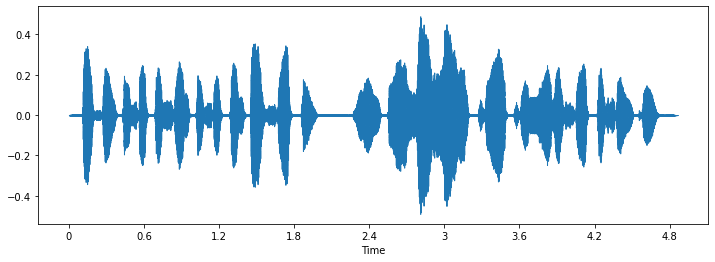

In [6]:
pathToFile = "audios/agente777.wav"
#Para convertir 
# wave_file = mp3_to_wav(pathToFile, 37, True)

data, sampling_rate = librosa.load(pathToFile);
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data,sampling_rate)

In [7]:
# Para escuchar el archivo
sound_file = AudioSegment.from_wav(pathToFile) # Aqui su archivo en WAV
ipd.Audio(pathToFile)  

In [9]:
audio_chunks = split_on_silence(sound_file, min_silence_len=100, silence_thresh=-30)
# print(audio_chunks)
# Los dividimos en segmentos 
for i, chunk in enumerate(audio_chunks):
   sound = chunk
   out_file = "splits/chunk{0}.wav".format(i)
   # Here concert the audio to mono.
   # sound = AudioSegment.from_mp3(source)  # load source
   print("Exportando: ", out_file)
   sound = sound.set_channels(1)  # mono   
   sound = sound.set_frame_rate(16000)  # 16000Hz
   # print(f'The audio segment channel: {sound.channels}')
   sound.export(out_file, format="wav") 

Exportando:  splits/chunk0.wav
Exportando:  splits/chunk1.wav
Exportando:  splits/chunk2.wav
Exportando:  splits/chunk3.wav
Exportando:  splits/chunk4.wav
Exportando:  splits/chunk5.wav
Exportando:  splits/chunk6.wav
Exportando:  splits/chunk7.wav
Exportando:  splits/chunk8.wav
Exportando:  splits/chunk9.wav
Exportando:  splits/chunk10.wav
Exportando:  splits/chunk11.wav
Exportando:  splits/chunk12.wav
Exportando:  splits/chunk13.wav


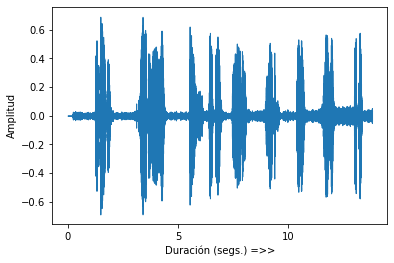

In [8]:
x, sr = librosa.load(pathToFile)
librosa.display.waveshow(y=x, sr=sr)
plt.xlabel("Duración (segs.) =>>")
plt.ylabel("Amplitud")
plt.show()

In [9]:
def displayTime(startFrame, endFrame): 
    # print(f'before decimal: {(startFrame/sr)*1000}')   
    print(' start time: ' + str(startFrame/sr) + ', end time: ' + str(endFrame/sr))

In [10]:
n_fft = 100
S = librosa.stft(x, n_fft=n_fft, hop_length=n_fft//2)
print(S.shape)
# Convertimos a dbs
D = librosa.amplitude_to_db(np.abs(S), ref=np.max)
np.max(abs(D))

(51, 6087)


80.0

In [2]:
# # nonMuteSections = librosa.effects.split(x, top_db=16) 
# # FINAL-PRO-vr\exports\chunk0.wav
# sound_file = AudioSegment.from_wav(pathToFile)
# nonMuteSections = split_on_silence(sound_file,  min_silence_len=500)
# nonMuteSections

In [1]:
# it = 0
# for i in nonMuteSections:
#     partSplitted = sound_file[(i[0]/sr)*1000:(i[1]/sr)*1000] # conversion a milisegundos
#     fileToExport = "splits/chunki{0}.wav".format(it)
#     print(f'Exportando: {fileToExport}')
#     partSplitted.export(fileToExport, format="wav")
#     it=it+1